<a href="https://colab.research.google.com/github/2303a52163/SML_2303a52163/blob/main/SML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 **SML ASSIGNMENT-8**


   
   **Course Name:        Statistical Machine Learning**  

   **Resources:          Google Colab**

   **Name:               U.Maheesh Varma**

   **RollNo:             2303A52163**

   **Batch:              34**

# **Question 1:**

**Below is an example dataset with 10 students (rows), 5 features, and a binary target label (Pass/Fail). The target label is 1 if the student is predicted to pass, and 0 if they are predicted to fail.**

**X1 : [10, 5, 15, 2, 12, 8, 14, 3, 11, 6]**

**X2 : [90, 60, 95, 30, 85, 75, 92, 50, 88, 65]**

**X3 : [85, 70, 90, 50, 88, 65, 93, 55, 80, 60]**

**X4 : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]**

**X5 : [100, 80, 100, 40, 90, 70, 95, 60, 85, 75]**

**Pass/Fail : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]**

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



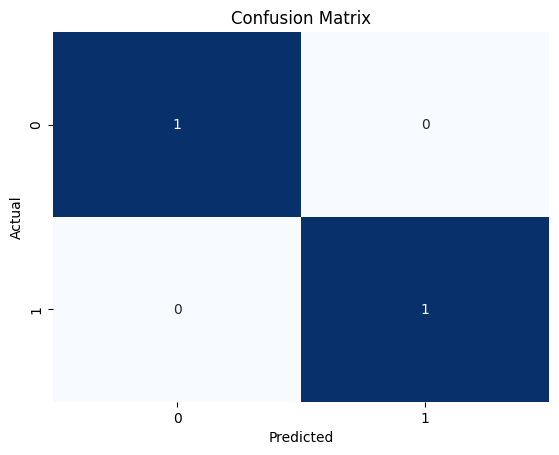

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Added the import for classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'X1': [10, 5, 15, 2, 12, 8, 14, 3, 11, 6],
    'X2': [90, 60, 95, 30, 85, 75, 92, 50, 88, 65],
    'X3': [85, 70, 90, 50, 88, 65, 93, 55, 80, 60],
    'X4': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'X5': [100, 80, 100, 40, 90, 70, 95, 60, 85, 75],
    'Pass/Fail': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

X = df.drop(columns=['Pass/Fail'])
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(cm)
print('Classification Report:')
print(report)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Questions 2:**

https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-datasetLinks

**Implement a logistic regression model to train above data, and find the accuracy**.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/diabetes_data_upload (1).csv')
print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
label_encoder = LabelEncoder()

for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = label_encoder.fit_transform(X[col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      